# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.metrics import ConfusionMatrixDisplayer

ImportError: cannot import name 'ConfusionMatrixDisplayer' from 'sklearn.metrics' (E:\Anaconda\Lib\site-packages\sklearn\metrics\__init__.py)

In [3]:
df = pd.read_csv('resources/demo001_clean.csv')
X = pd.read_csv('resources/demo001_x.csv')
y = pd.read_csv('resources/demo001_y.csv')

y = y.drop('Unnamed: 0', axis=1)
X = X.drop('Unnamed: 0', axis=1)

#train_df, test_df = train_test_split(df, test_size=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [78]:
#2.1
# inicializando árvore
clf = DecisionTreeClassifier(random_state=42, max_depth=3)

#2.2
# Treinando modelo
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

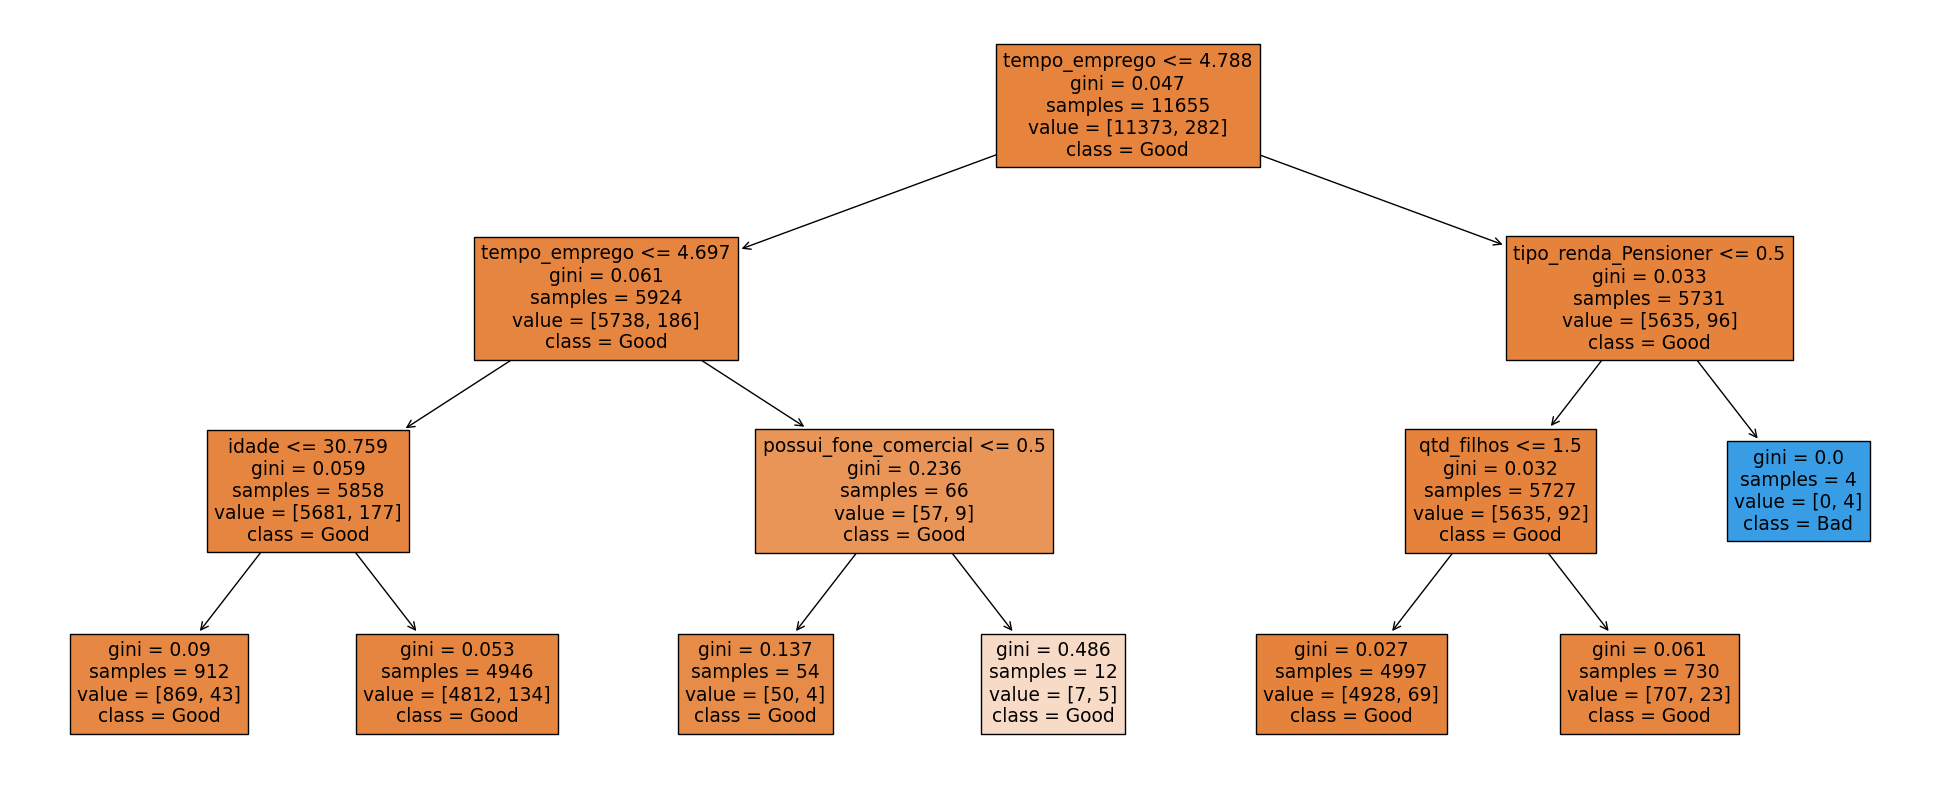

In [46]:
#2.3.
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Good', 'Bad'],
          feature_names=X_train.columns.tolist());
plt.show()

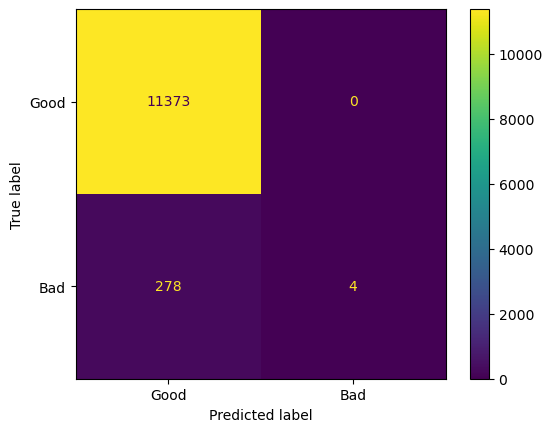

In [59]:
valid_predictions = clf.predict(X_train)
cm = confusion_matrix(y_train, valid_predictions, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])

MatrizDeConfusao.plot()
plt.show()

In [65]:
#2.5
train_acc = accuracy_score(y_train, valid_predictions)
train_acc

0.9761475761475762

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

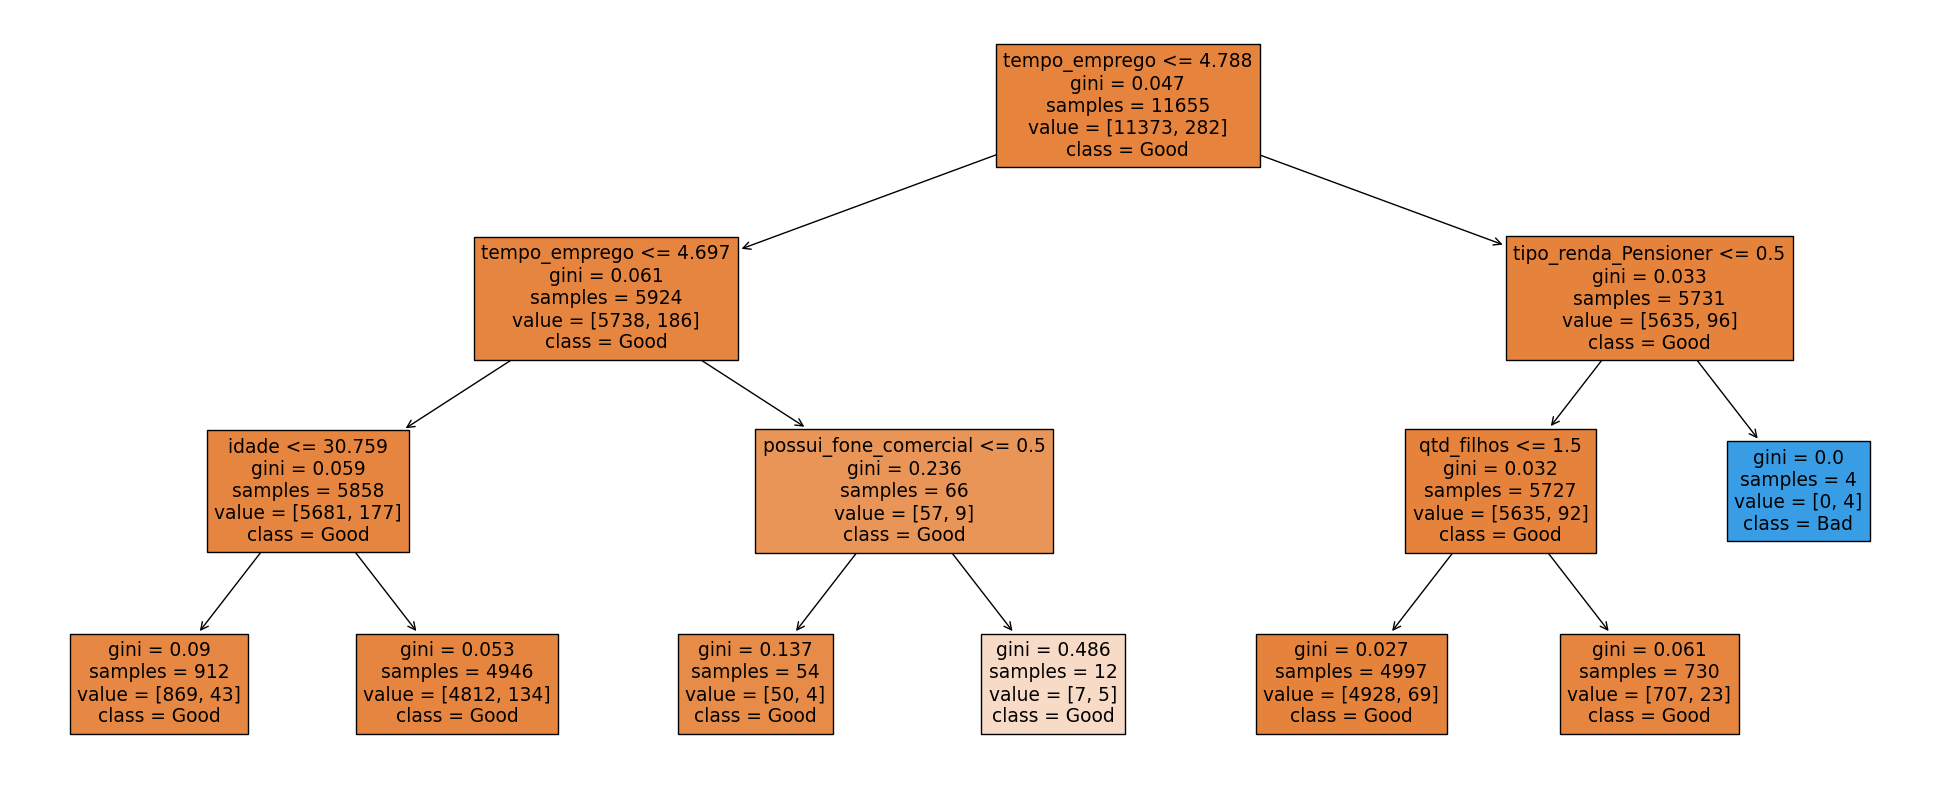

In [81]:
#3.1
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Good', 'Bad'],
          feature_names=X.columns.tolist());
plt.show()

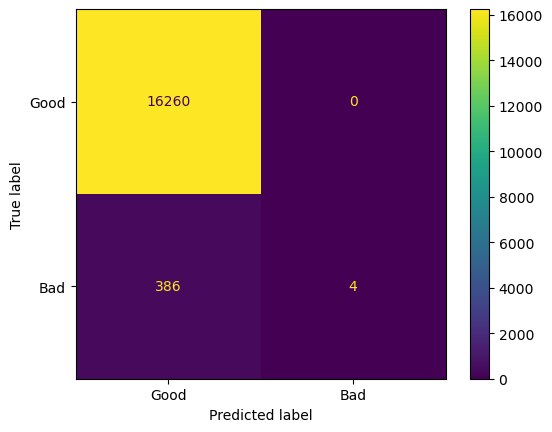

In [62]:
#3.2
valid_predictions_base = clf.predict(X)
cm = confusion_matrix(y, valid_predictions_base, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])

MatrizDeConfusao.plot()
plt.show()

In [72]:
#3.3: Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
base_acc = accuracy_score(y, valid_predictions_base)
base_acc

acc_comp = train_acc/base_acc*100
print(f"Acurácia de teste é {acc_comp:.2f}% similar à acurácia base.")

Acurácia de teste é 99.93% similar à acurácia base.


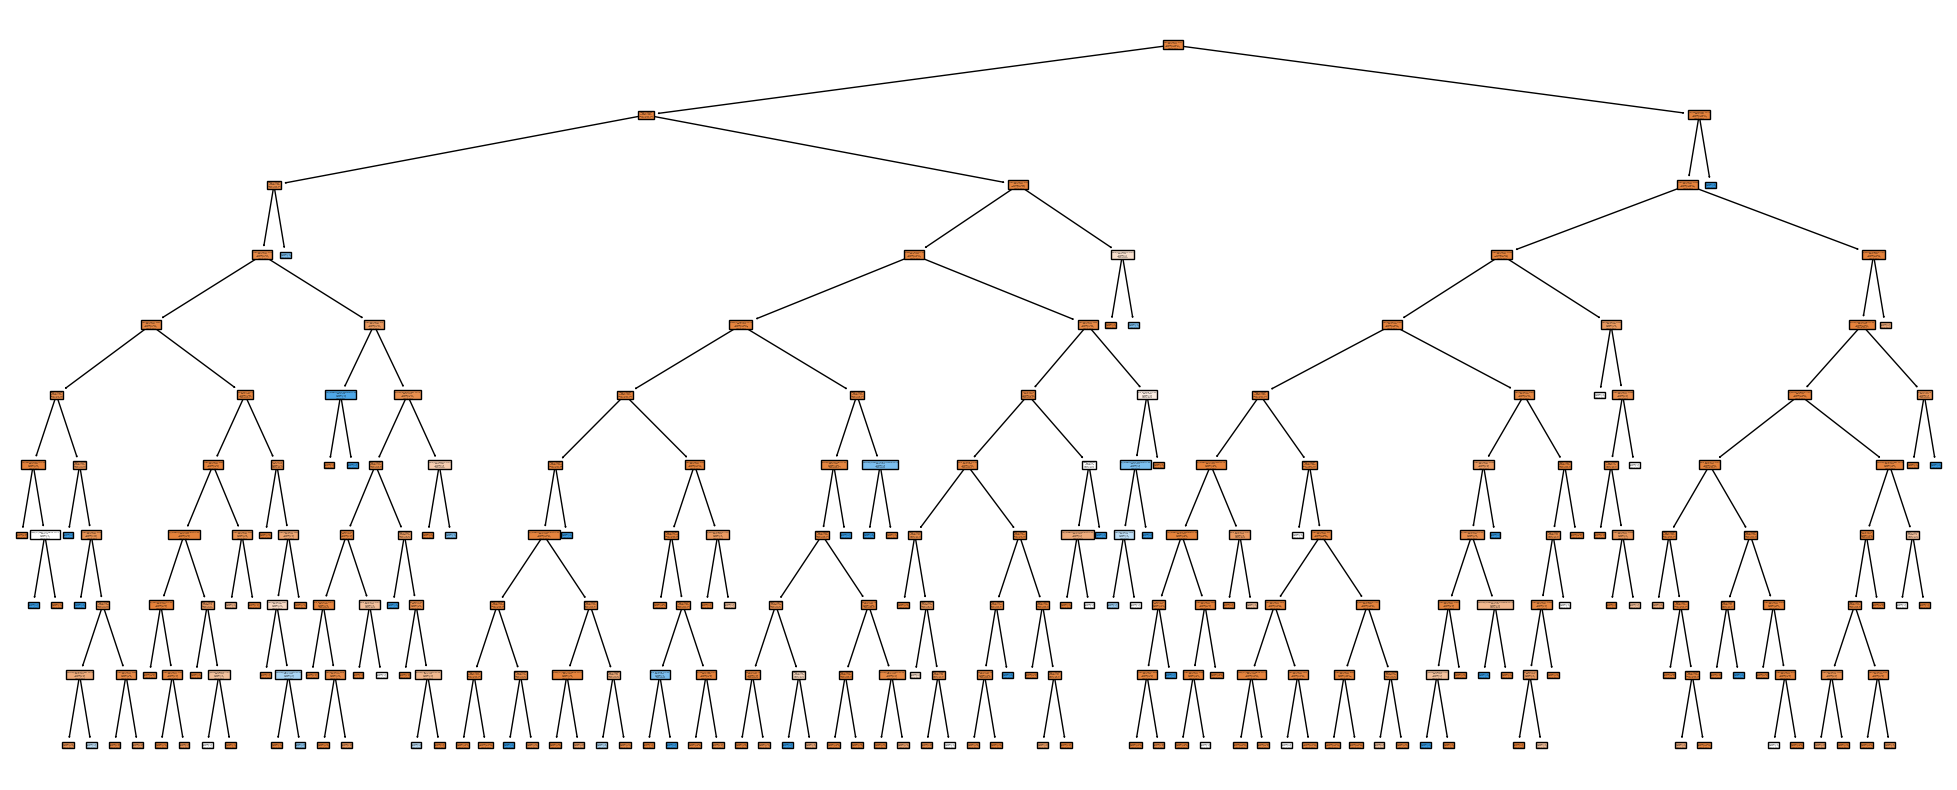

In [82]:
#3.4: Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
#Use o random_state = 123. Avalie a matriz de classificação. 
#Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

clf_new = DecisionTreeClassifier(random_state=123, max_depth=10)

# Treinando modelo
clf_new.fit(X, y)

plt.figure(figsize=(25, 10))
plot_tree(clf_new,
          filled=True,
          class_names=['Good', 'Bad'],
          feature_names=X.columns.tolist());
plt.show()

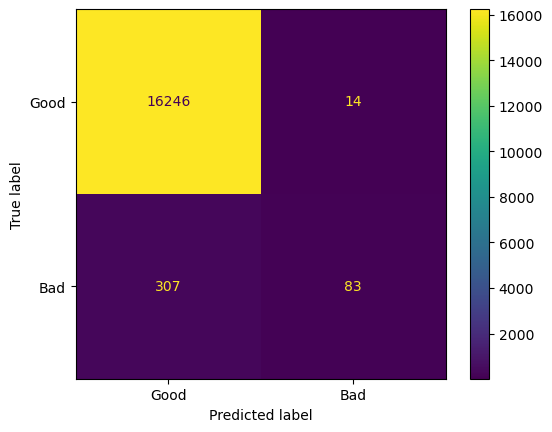

In [83]:
valid_predictions_new = clf_new.predict(X)
cm = confusion_matrix(y, valid_predictions_new, labels=clf.classes_)
MatrizDeConfusao = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])

MatrizDeConfusao.plot()
plt.show()

In [84]:
16246+14+83+307

16650

In [94]:
bad = (83+307)
bad_prop = bad/16650*100
print(f"Proporção de maus pagadores: {bad_prop:.2f}%")


Proporção de maus pagadores: 2.34%


In [102]:
#3.5: Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

real_acc = (16246+83)/16650
real_acc

0.9807207207207207

In [103]:
new_acc = (16246+83-bad)/16650
new_acc

0.9572972972972973

In [110]:
acc_dif = real_acc - new_acc 
print(f"Considerar os maus como bons resulta em uma diferença de aproximadamente {acc_dif*100:.2f}%.")

Considerar os maus como bons resulta em uma diferença de aproximadamente 2.34%.
